In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [21]:
X=np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y=np.asarray([[0],[0],[0],[1]])
input_size=2
middle_size = 2
output_layer_size=1
#Los placeholders son para los datos de entrada y salida
x = tf.placeholder(tf.float32, [None, input_size])
y_ = tf.placeholder(tf.float32, [None, output_layer_size]) 


In [22]:
#Las variables para lo que se va a ir calculando y modificando en el camino
W_layer1 = tf.Variable(tf.random_uniform([input_size,output_layer_size], -1, 1), name="W_layer1")
b_layer1 = tf.Variable(tf.zeros([middle_size]), name="b_layer1")  #Es el w0

W_layer2 = tf.Variable(tf.random_uniform([middle_size,output_layer_size], -1, 1), name="W_layer2")
b_layer2 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer2")

In [23]:
#La propagacion de la red es el algoritmo de la regularizacion
y = tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1) #Regresion logistica
lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #cuadrático
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)
init = tf.global_variables_initializer()
sess = tf.Session() # tipo de sesion, puede ser interactiva

In [24]:
#Correr el tensorflow
sess.run(init)
for i in range(1000):
  sess.run(train_step, feed_dict={x: X, y_: Y})

In [27]:
#Ejemplo de como ver las variables
print(sess.run(y, feed_dict={x: X}))
print(sess.run(W_layer1))
print(sess.run(W_layer2))


[[ 0.1159685   0.1159685 ]
 [ 0.31527933  0.31527933]
 [ 0.31743872  0.31743872]
 [ 0.62011933  0.62011933]]
[[ 1.26560676]
 [ 1.25562227]]
[[-0.58562875]
 [ 0.52292204]]


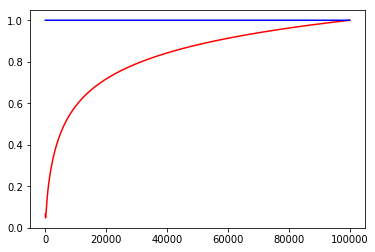

In [28]:
# Guardamos pesos en cada iteración del entrenamiento
delta_w1 = []
delta_w2 = []
sess.run(init)
for i in range(100000):
    sess.run(train_step, feed_dict={x: X, y_: Y})
    delta_w1 += [sess.run(W_layer1)]
    delta_w2 += [sess.run(W_layer2)]

W1 = delta_w1[-1]
W2 = delta_w2[-1]

l1 = [np.mean(w / W1) for w in delta_w1]
l2 = [np.mean(w / W2) for w in delta_w2]

x = range(100000)


plt.plot(x, l1, 'r-') # Esta línea son los pesos de la capa de hasta la derecha 
plt.plot(x, l2, 'b-') # Esto línea son los pesos de la capa de hasta la izquierda 
plt.show()

sess.close()